In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



Loading Dataset-UCI- Breast Cancer (

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epi_size','bare_nuclei','bland_cromatin','normal_nucleoli','mitosis','class']

In [3]:
df = pd.read_csv(url,names=names )

In [4]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

Data Preprocessing

In [6]:
df.drop(['id'],axis = 1,inplace = True)

In [7]:
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
df.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epi_size', 'bare_nuclei', 'bland_cromatin',
       'normal_nucleoli', 'mitosis', 'class'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   clump_thickness     699 non-null    int64 
 1   uniform_cell_size   699 non-null    int64 
 2   uniform_cell_shape  699 non-null    int64 
 3   marginal_adhesion   699 non-null    int64 
 4   single_epi_size     699 non-null    int64 
 5   bare_nuclei         699 non-null    object
 6   bland_cromatin      699 non-null    int64 
 7   normal_nucleoli     699 non-null    int64 
 8   mitosis             699 non-null    int64 
 9   class               699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [11]:
df['bare_nuclei'].value_counts()

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [12]:
df[df['bare_nuclei']=='?']

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitosis,class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [13]:
df[df['bare_nuclei']=='?'].sum()

clump_thickness                     54
uniform_cell_size                   39
uniform_cell_shape                  46
marginal_adhesion                   29
single_epi_size                     39
bare_nuclei           ????????????????
bland_cromatin                      50
normal_nucleoli                     44
mitosis                             16
class                               36
dtype: object

In [14]:
df.replace("?",np.nan,inplace=True)

In [15]:
df['bare_nuclei'][23]

nan

In [16]:
df.isna().sum()

clump_thickness        0
uniform_cell_size      0
uniform_cell_shape     0
marginal_adhesion      0
single_epi_size        0
bare_nuclei           16
bland_cromatin         0
normal_nucleoli        0
mitosis                0
class                  0
dtype: int64

In [17]:
df.fillna(method='ffill',inplace=True)

In [18]:
df.isna().sum()

clump_thickness       0
uniform_cell_size     0
uniform_cell_shape    0
marginal_adhesion     0
single_epi_size       0
bare_nuclei           0
bland_cromatin        0
normal_nucleoli       0
mitosis               0
class                 0
dtype: int64

In [19]:
df['bare_nuclei']=df['bare_nuclei'].astype('int64')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   clump_thickness     699 non-null    int64
 1   uniform_cell_size   699 non-null    int64
 2   uniform_cell_shape  699 non-null    int64
 3   marginal_adhesion   699 non-null    int64
 4   single_epi_size     699 non-null    int64
 5   bare_nuclei         699 non-null    int64
 6   bland_cromatin      699 non-null    int64
 7   normal_nucleoli     699 non-null    int64
 8   mitosis             699 non-null    int64
 9   class               699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
uniform_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
uniform_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
single_epi_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.529328,3.635260,1.0,1.0,1.0,6.0,10.0
bland_cromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitosis,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [22]:
df.describe

<bound method NDFrame.describe of      clump_thickness  uniform_cell_size  uniform_cell_shape   
0                  5                  1                   1  \
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
..               ...                ...                 ...   
694                3                  1                   1   
695                2                  1                   1   
696                5                 10                  10   
697                4                  8                   6   
698                4                  8                   8   

     marginal_adhesion  single_epi_size  bare_nuclei  bland_cromatin   
0                    1                2            1               3  \
1                    5                7           10             

C:\Users\hp\AppData\Local\Temp\ipykernel_3320\3947729597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'],kde = True)


<AxesSubplot:xlabel='class', ylabel='Density'>

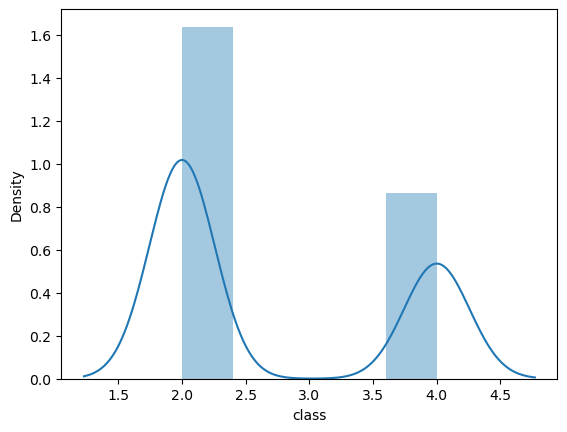

In [23]:
sns.distplot(df['class'],kde = True)

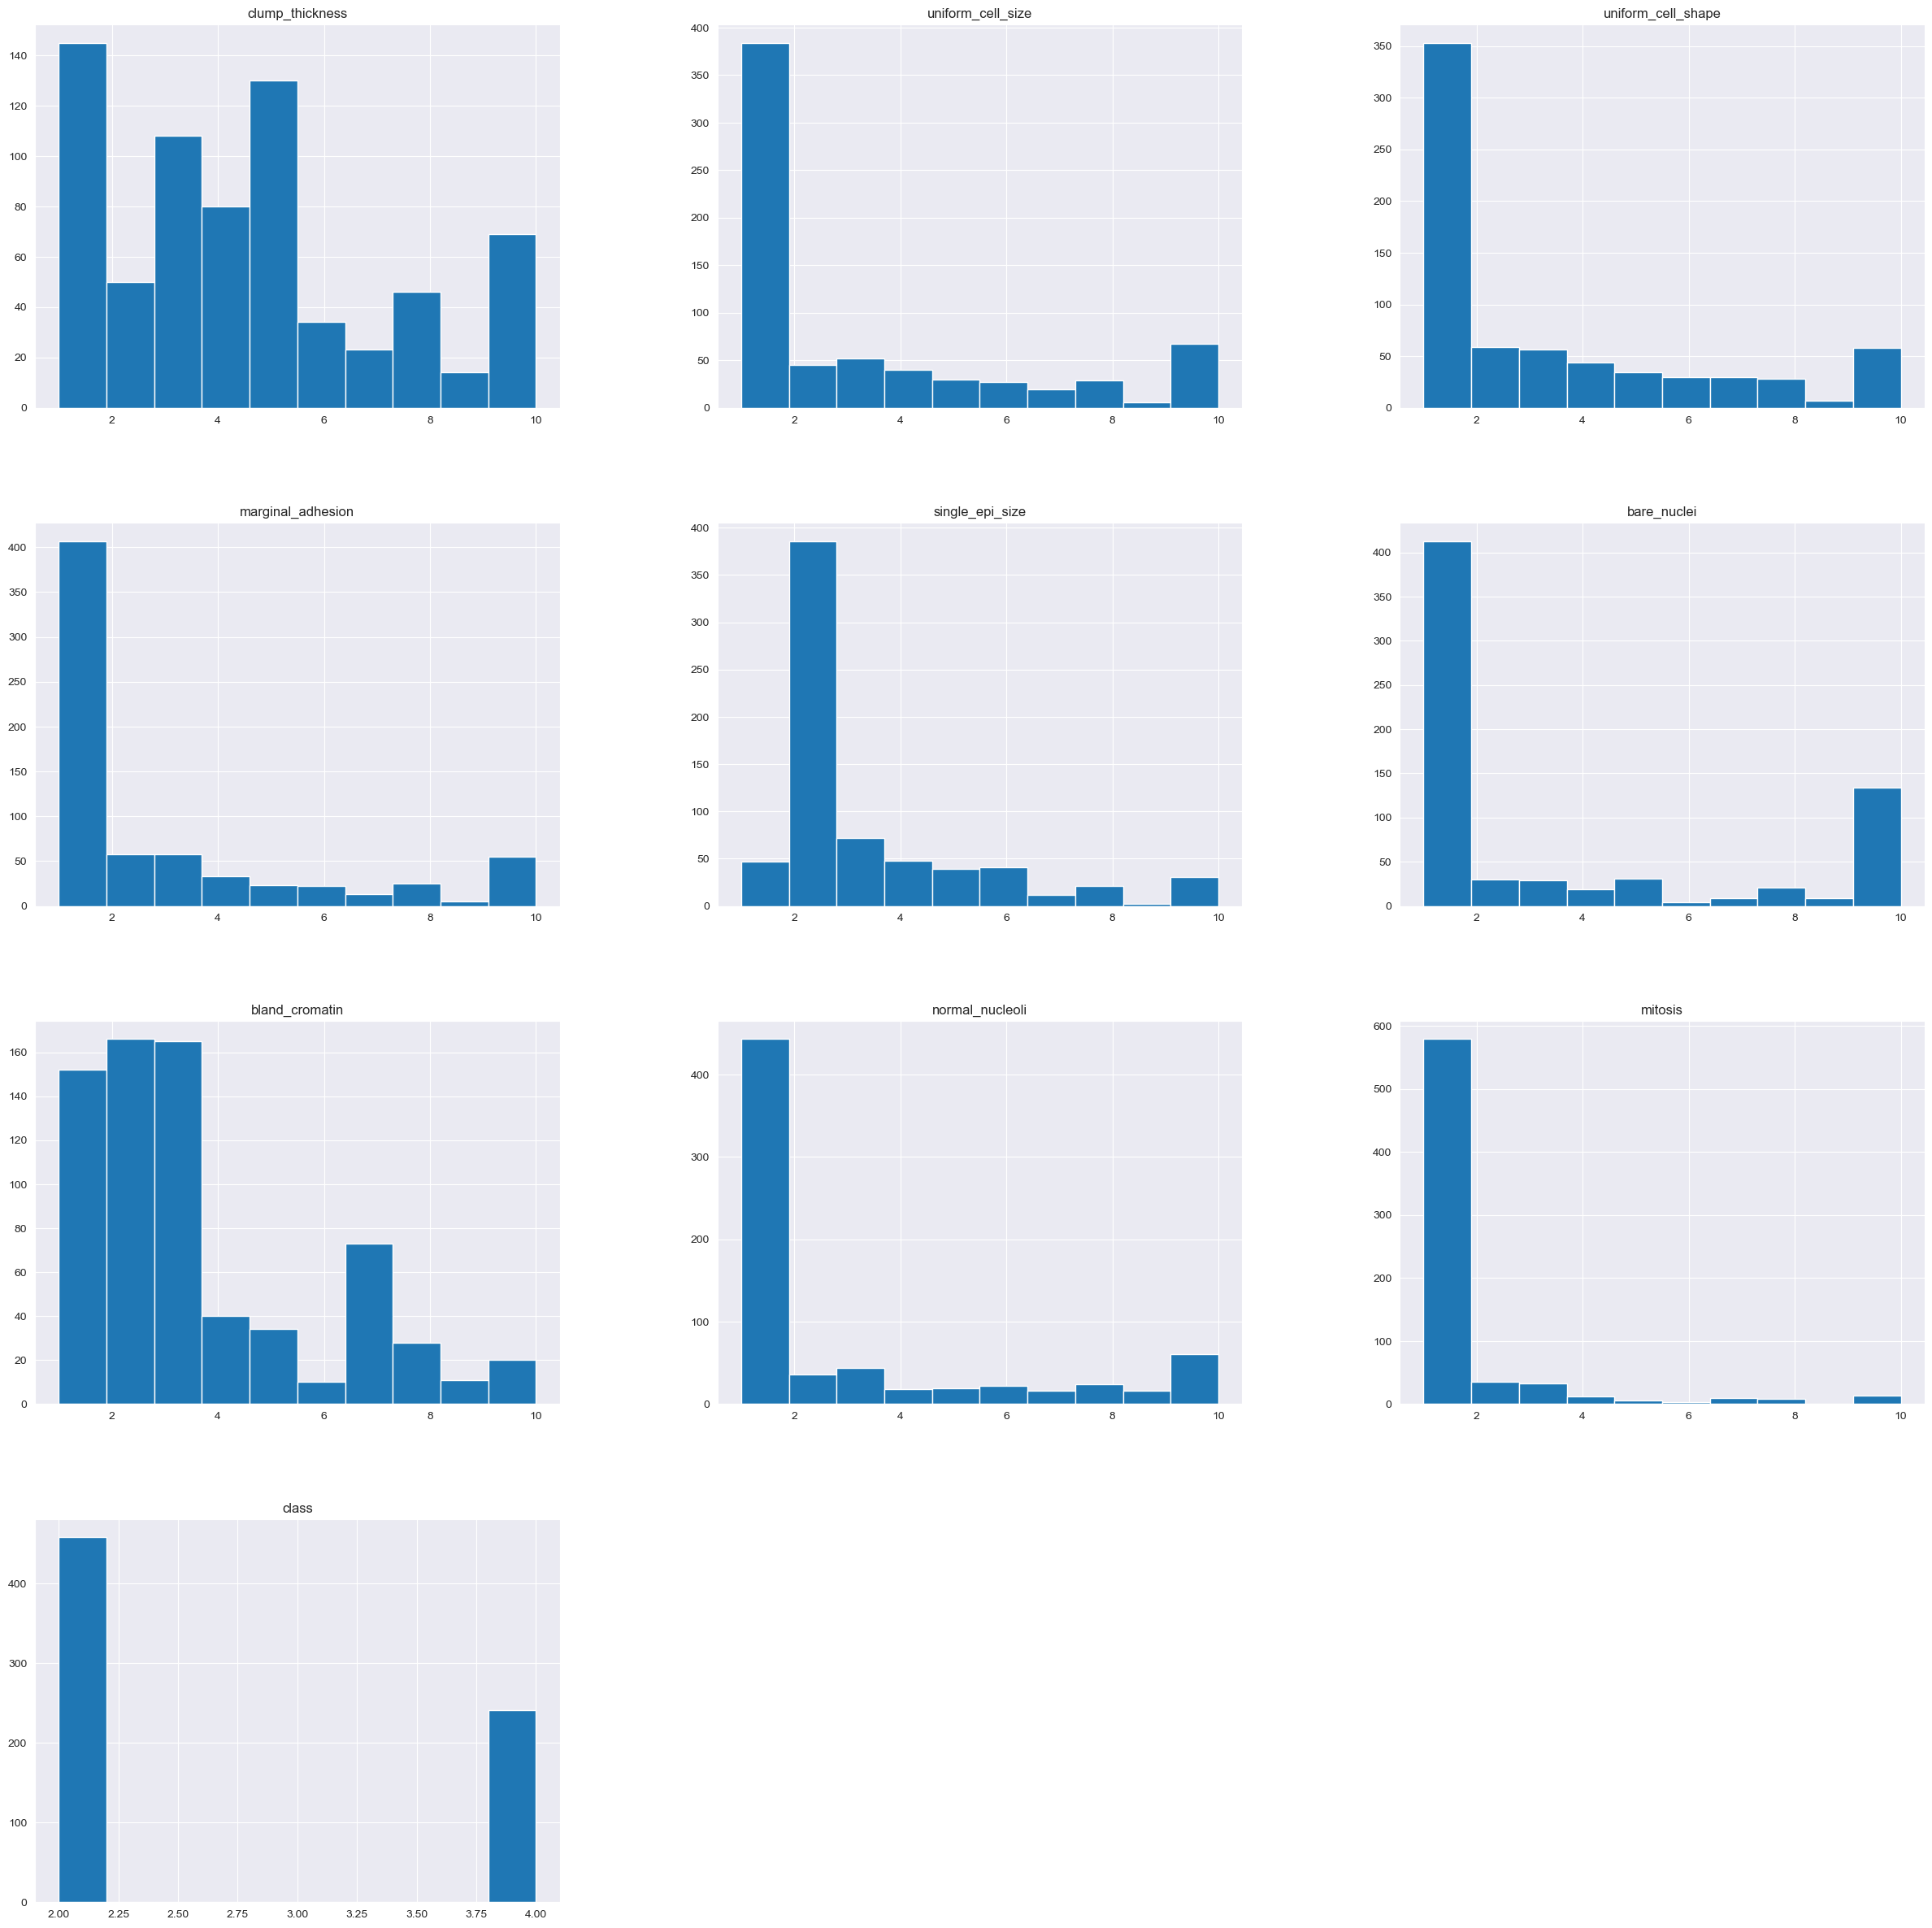

In [24]:
sns.set_style("darkgrid")
df.hist(figsize=(30,30))
plt.show()

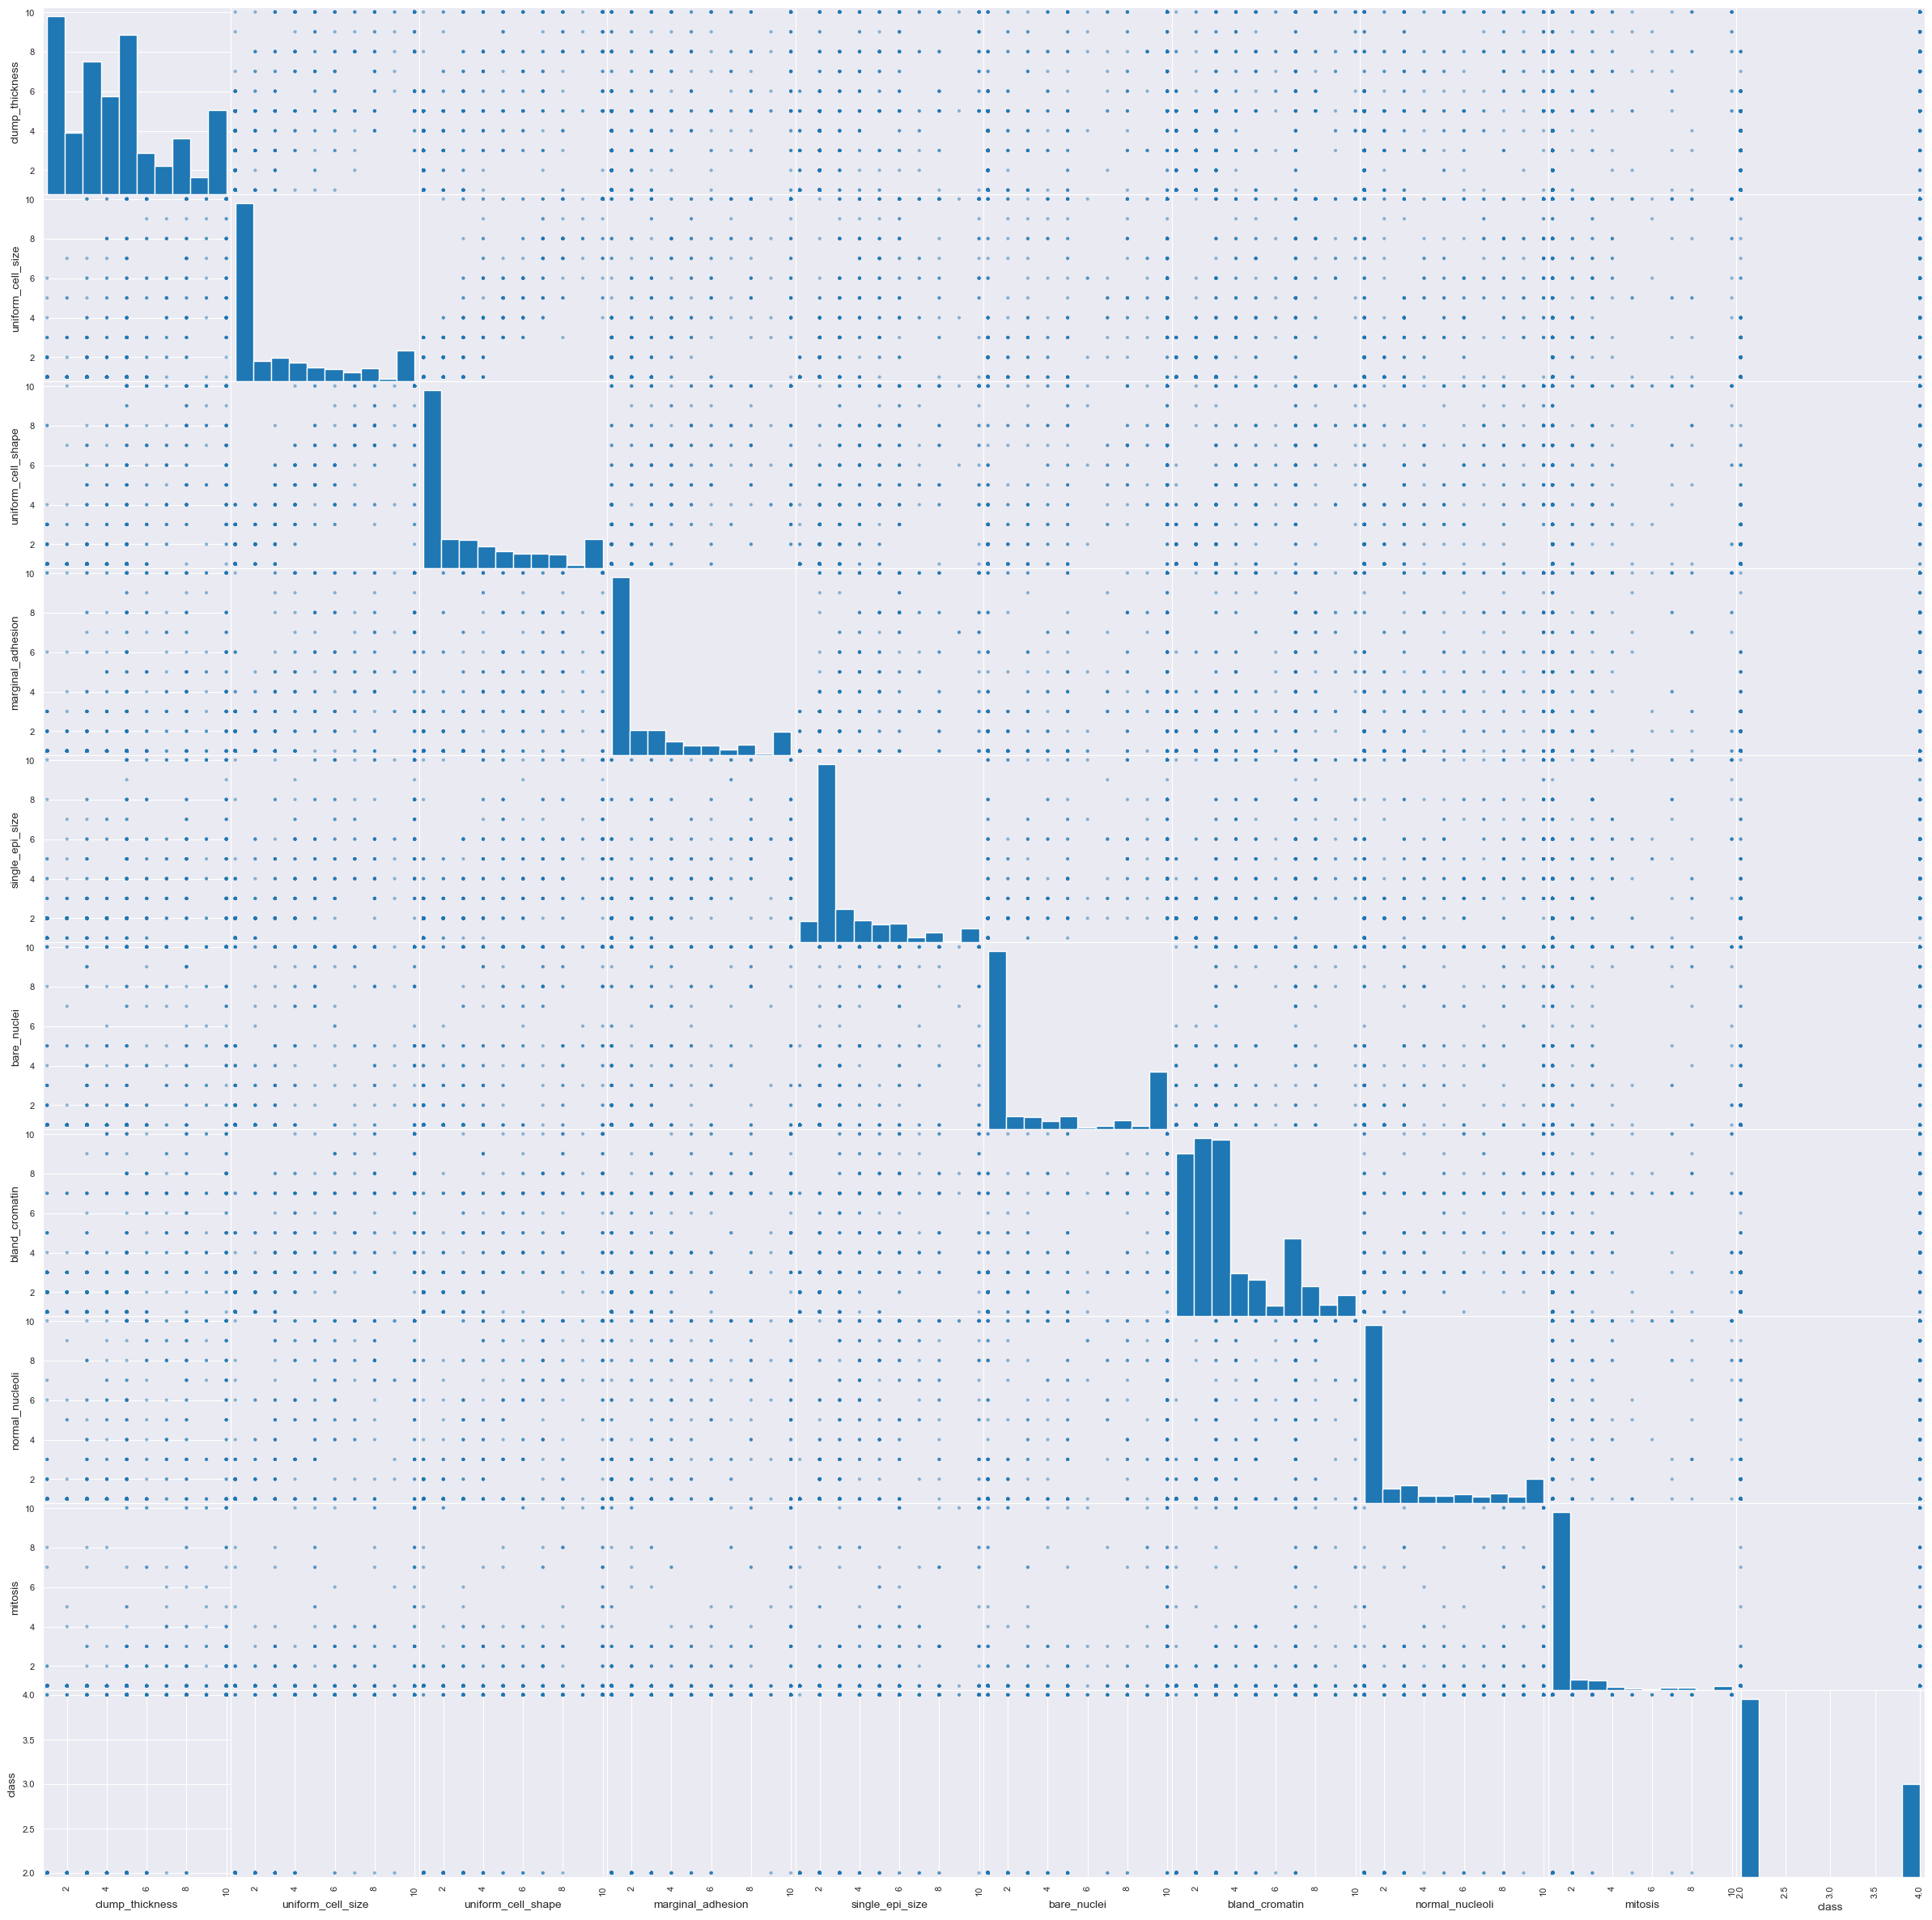

In [25]:
scatter_matrix(df,figsize=(30,30))
plt.show()

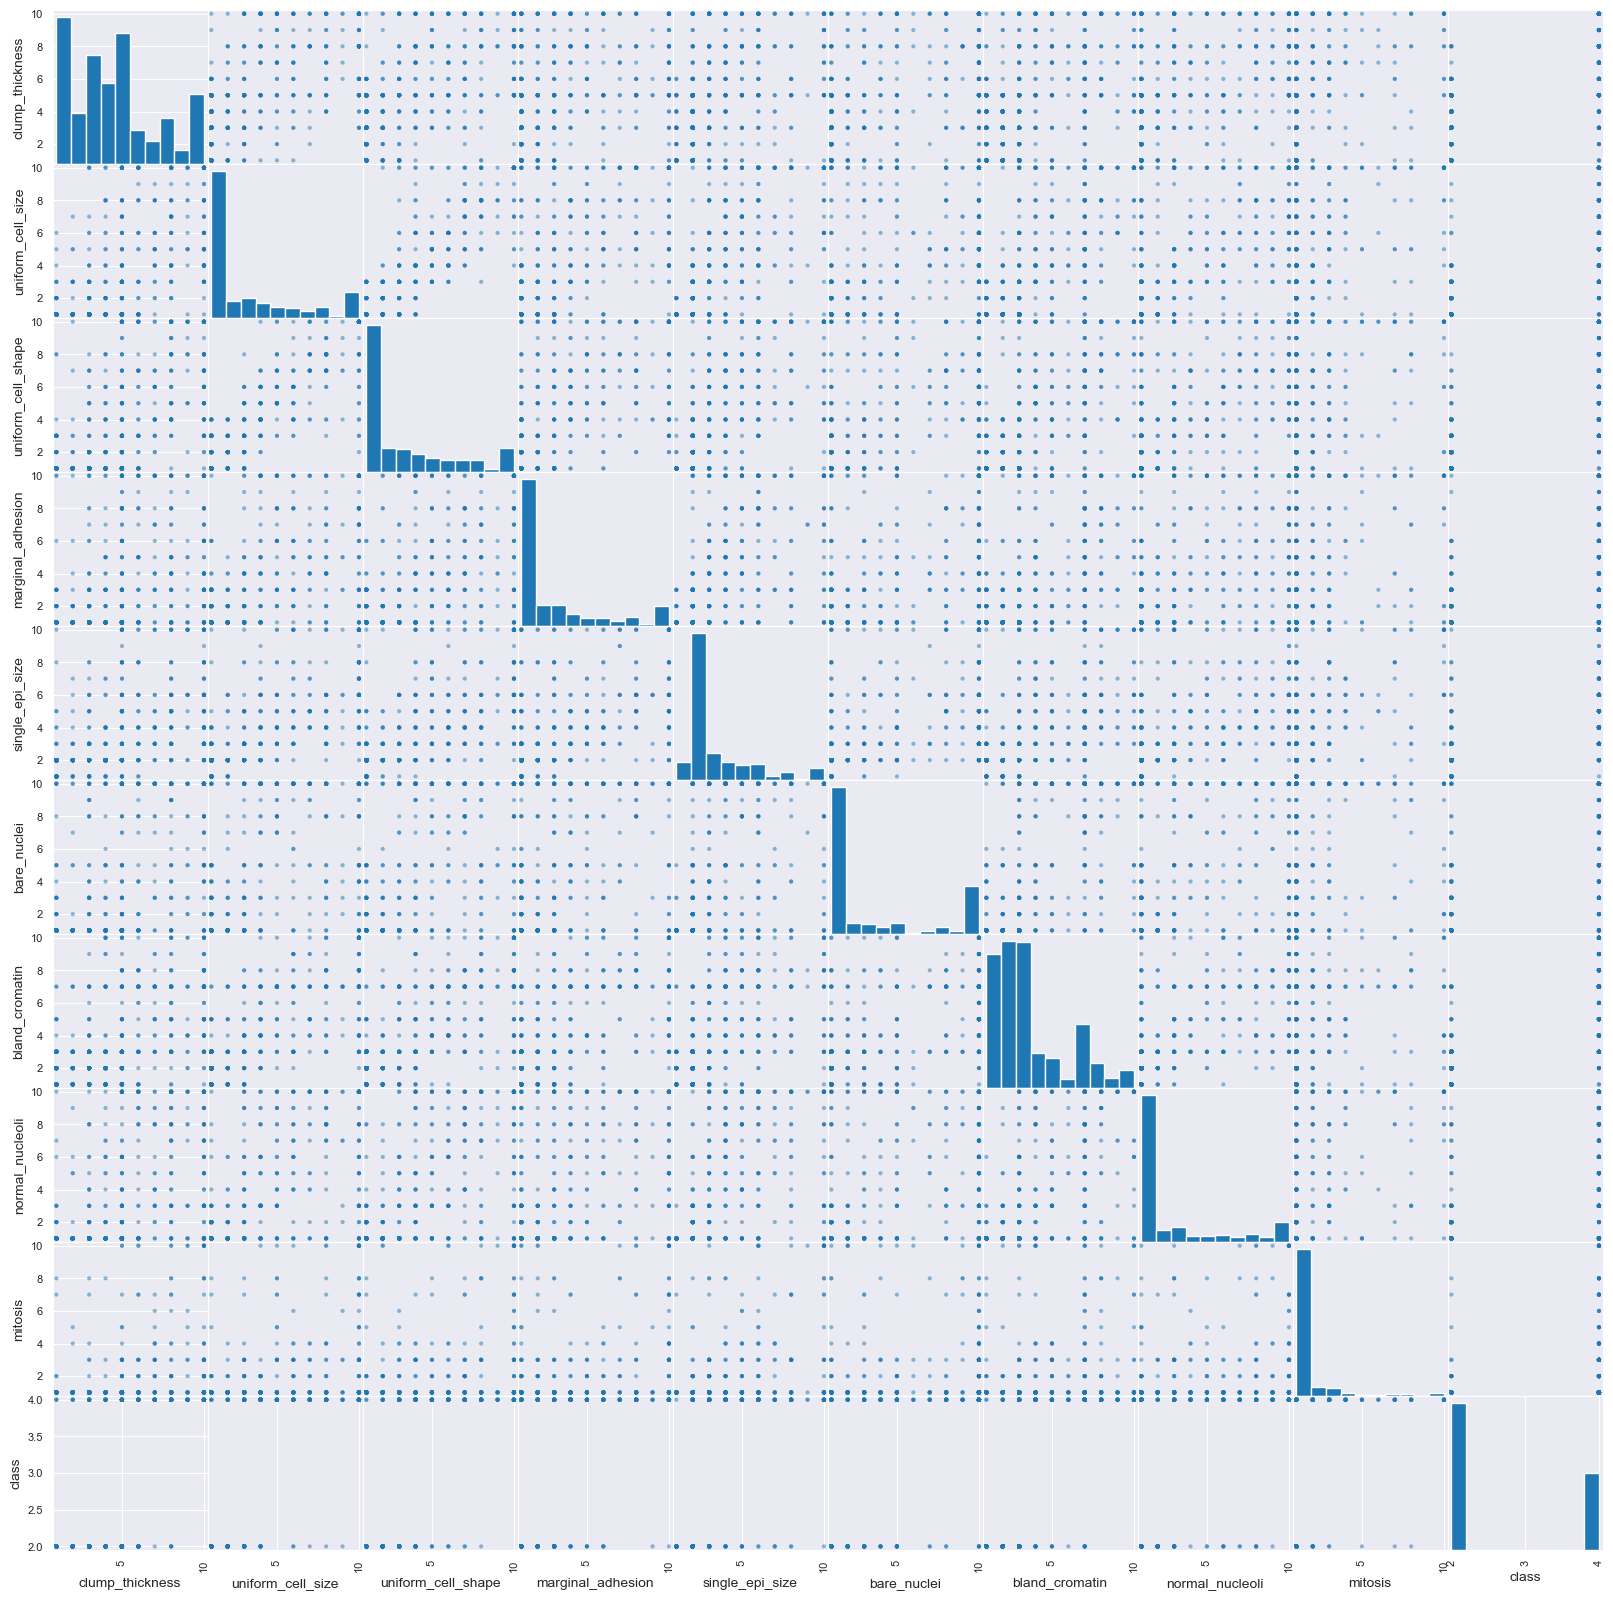

In [26]:
scatter_matrix(df,figsize=(20,20))
plt.show()

<AxesSubplot:>

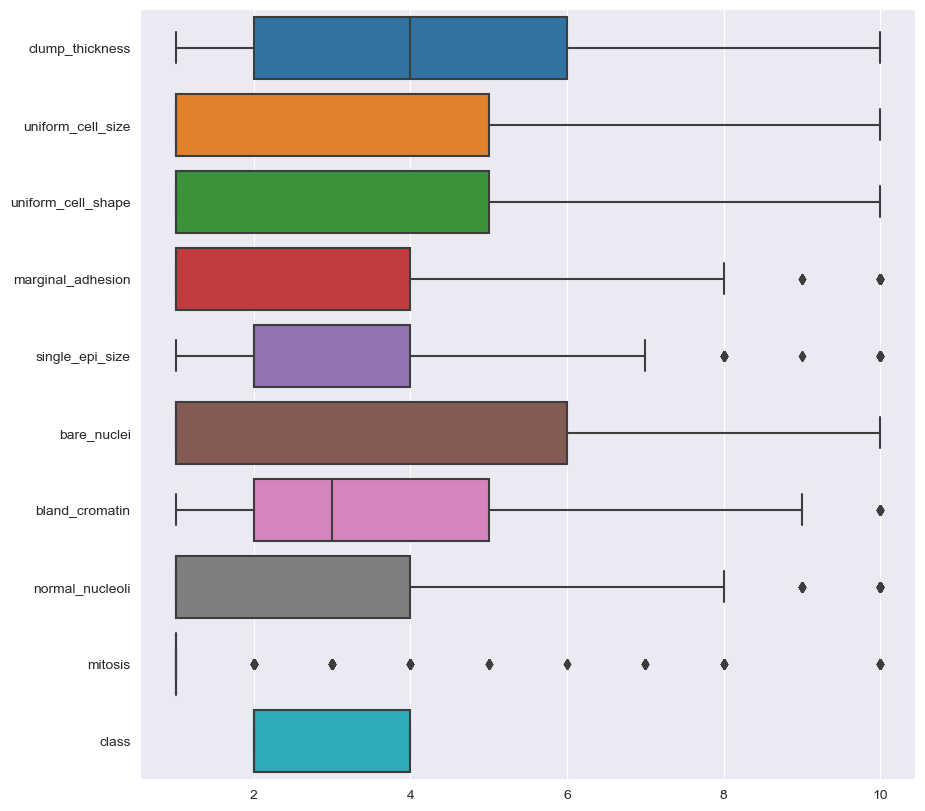

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h')

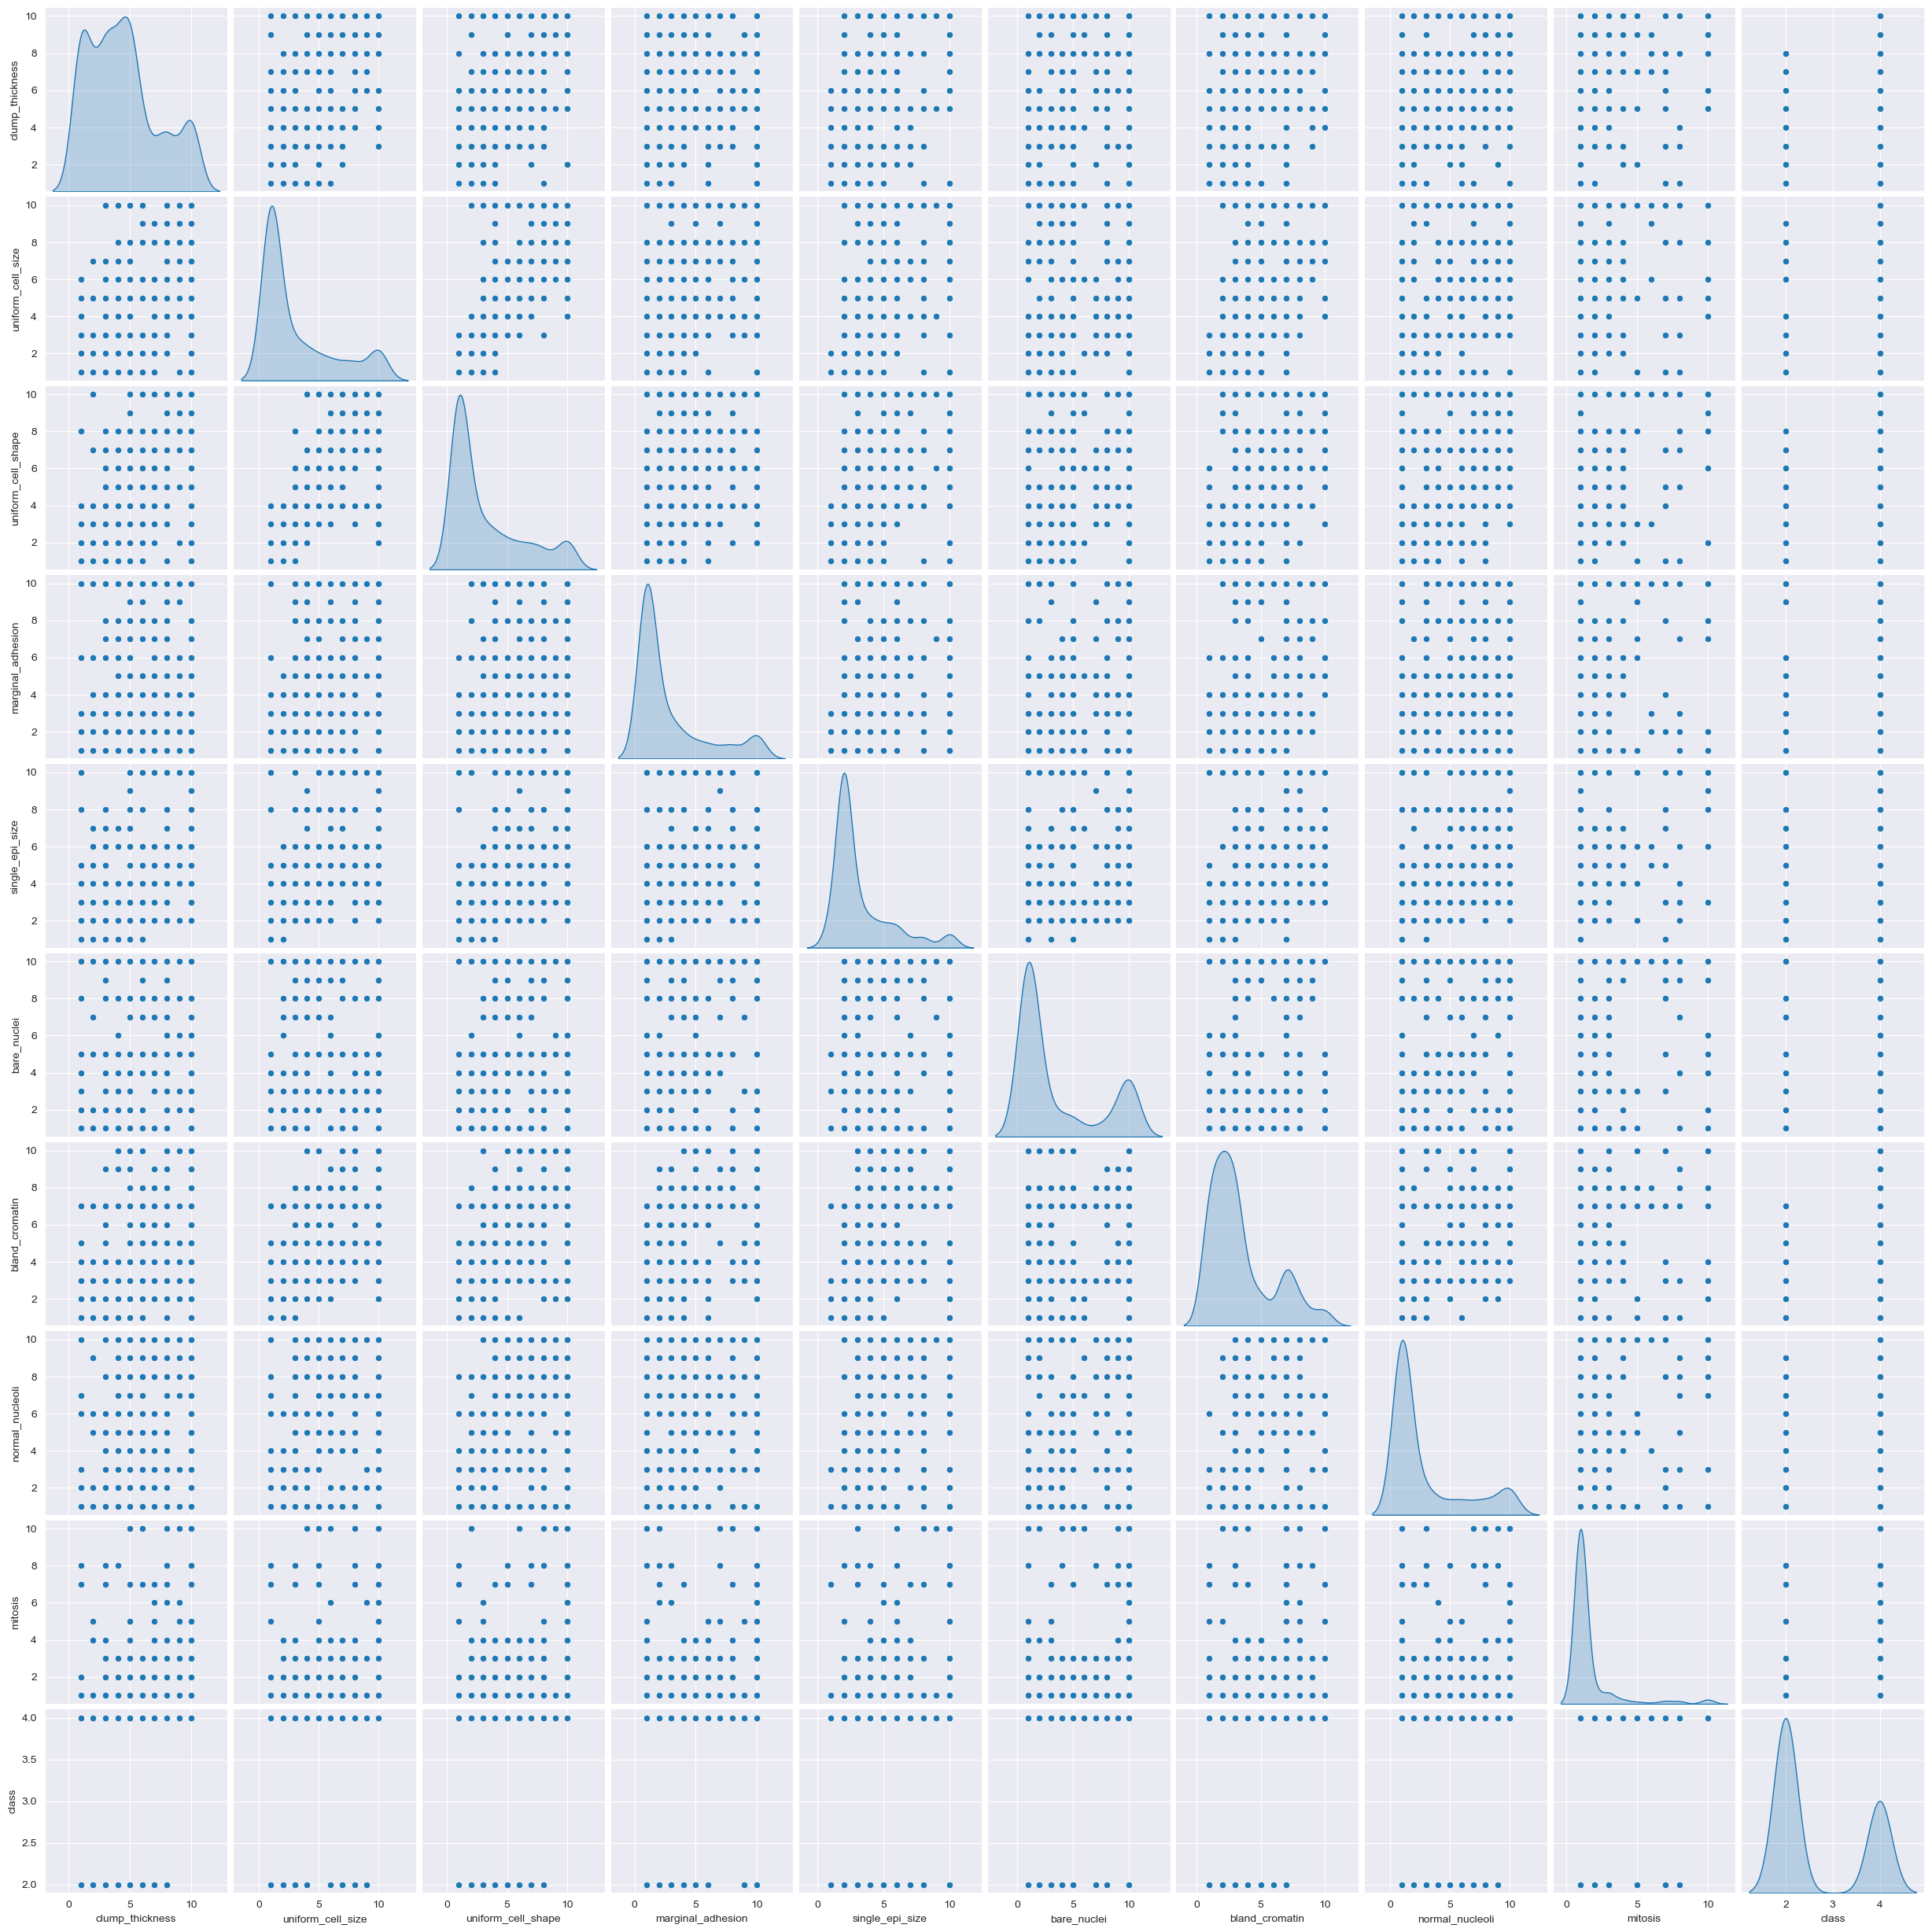

In [28]:
sns.pairplot(df,diag_kind='kde')

In [29]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epi_size,bare_nuclei,bland_cromatin,normal_nucleoli,mitosis,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.583571,0.558428,0.535835,0.350034,0.716001
uniform_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.681309,0.755721,0.722865,0.458693,0.817904
uniform_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.701137,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.663669,0.666715,0.603352,0.417633,0.696800
single_epi_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.579340,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.583571,0.681309,0.701137,0.663669,0.579340,1.000000,0.671398,0.571895,0.337078,0.807394
bland_cromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.671398,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.571895,0.665878,1.000000,0.428336,0.712244
mitosis,0.350034,0.458693,0.438911,0.417633,0.479101,0.337078,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.807394,0.756616,0.712244,0.423170,1.000000


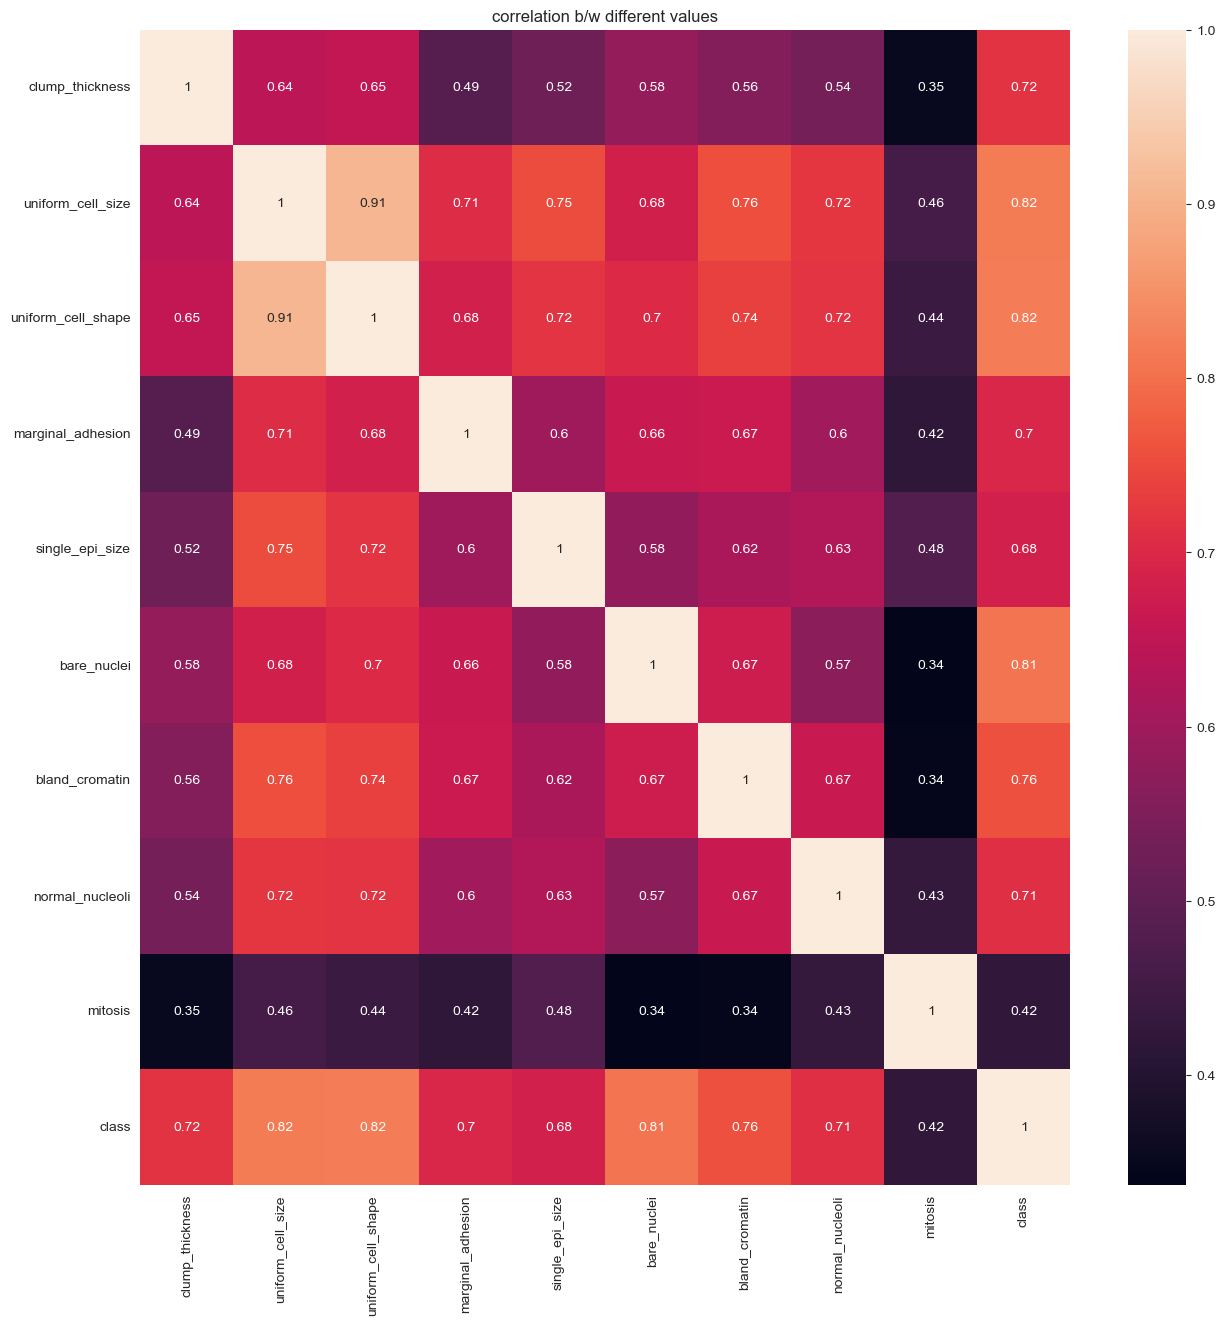

In [30]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,annot=True)
plt.title("correlation b/w different values")
plt.show()

In [31]:
cor_target = abs(cor["class"])

relevant_features = cor_target[cor_target>0]
relevant_features

clump_thickness       0.716001
uniform_cell_size     0.817904
uniform_cell_shape    0.818934
marginal_adhesion     0.696800
single_epi_size       0.682785
bare_nuclei           0.807394
bland_cromatin        0.756616
normal_nucleoli       0.712244
mitosis               0.423170
class                 1.000000
Name: class, dtype: float64

In [32]:
Y = df['class'].values
X = df.drop('class', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=30)

In [33]:
scoring = 'accuracy'

model = []
model.append(("CART",DecisionTreeClassifier()))
model.append(())

In [35]:
scoring = "accuracy"
models=[]
models.append(("CART",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))

#evalute
results=[]
names=[]

for name,model in models:
    kfold = KFold(n_splits=10)
    cvresult= cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cvresult)
    names.append(name)
    msg="for %s Model:Mean accuracy is %f(Std accuracy is %f)" %(name,cvresult.mean(),cvresult.std())
    print(msg)

for CART Model:Mean accuracy is 0.928486(Std accuracy is 0.024470)
for SVM Model:Mean accuracy is 0.969388(Std accuracy is 0.024575)
for NB Model:Mean accuracy is 0.957058(Std accuracy is 0.026525)
for KNN Model:Mean accuracy is 0.961224(Std accuracy is 0.028057)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [36]:
for name,model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print("Model name:",name)
    print("Accuracy Score:", accuracy_score(y_test,predictions))
    print("Classification Report", classification_report(y_test, predictions))

Model name: CART
Accuracy Score: 0.9666666666666667
Classification Report               precision    recall  f1-score   support

           2       0.96      0.99      0.97       134
           4       0.97      0.93      0.95        76

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

Model name: SVM
Accuracy Score: 0.9714285714285714
Classification Report               precision    recall  f1-score   support

           2       0.97      0.99      0.98       134
           4       0.97      0.95      0.96        76

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210

Model name: NB
Accuracy Score: 0.9619047619047619
Classification Report               precision    recall  f1-score   support

           2       0.97      0.97      0.97       134
           4      

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


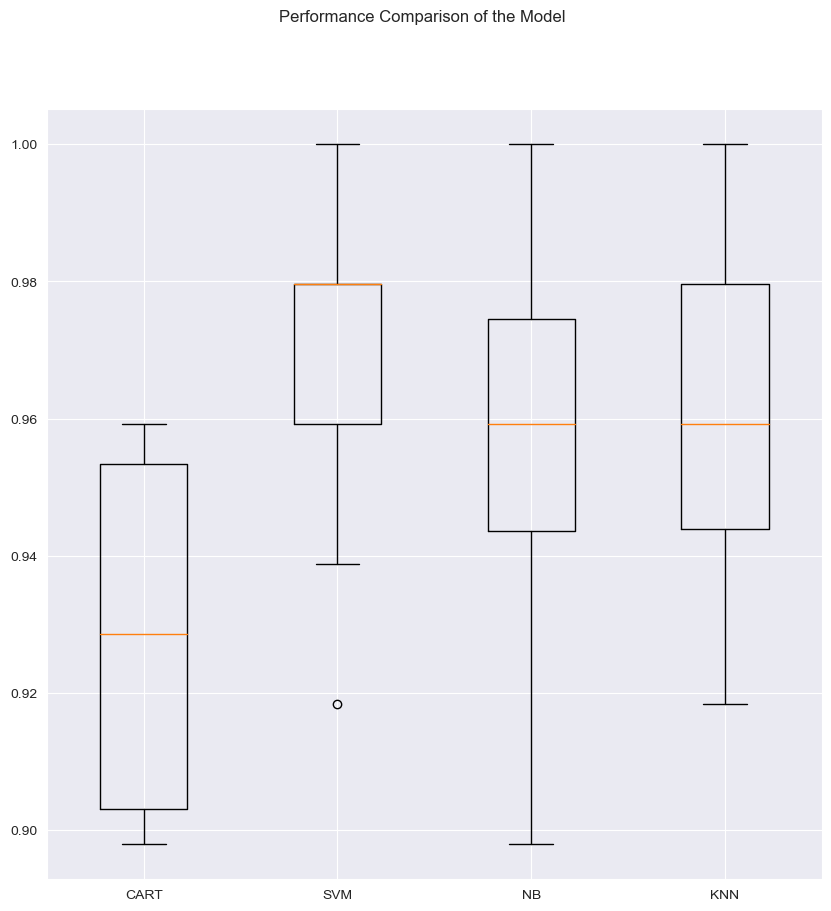

In [38]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Performance Comparison of the Model")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### SVM ( Best perfomance)

In [43]:
clf = SVC()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print("Accuracy of SVM is", accuracy)

Accuracy of SVM is 0.9714285714285714


In [44]:
predict = clf.predict(X_test)
predict

array([2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   clump_thickness     699 non-null    int64
 1   uniform_cell_size   699 non-null    int64
 2   uniform_cell_shape  699 non-null    int64
 3   marginal_adhesion   699 non-null    int64
 4   single_epi_size     699 non-null    int64
 5   bare_nuclei         699 non-null    int64
 6   bland_cromatin      699 non-null    int64
 7   normal_nucleoli     699 non-null    int64
 8   mitosis             699 non-null    int64
 9   class               699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [46]:
example_measures = [[4,2,1,1,1,2,3,2,1]]

predictions =clf.predict(example_measures)
print("The class is (2 for Benign and 4 for Malign):", predictions)

The class is (2 for Benign and 4 for Malign): [2]


In [48]:
example_m2 = [[5,10,10,3,7,3,8,10,2]]
predictions =clf.predict(example_m2)
print("The class is:", predictions)

The class is: [4]


#### Pickle file getting Download

In [50]:
import pickle

pickle.dump(clf,open('modelsvm.pkl','wb'))

model = pickle.load(open('modelsvm.pkl','rb'))
print(model.predict([[4,2,1,1,1,2,3,2,1]]))

[2]
